In [61]:
!pip install h2o      

In [62]:
import h2o             #importing the h2o Python module

In [63]:
h2o.init()             #initializing a local H2O cluster.

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,5 hours 33 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.7
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_unknownUser_tcmlkz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.084 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


On executing local H2O cluster, some information will be printed on the screen such as, the number of nodes, total memory, Python version, etc.. Also, the h2o.init() makes sure that no prior instance of H2O is running. By default, the H2O instance uses all the cores and about 25% of the system’s memory. However, in case you wish to allocate it a fixed chunk of memory, you can specify it in the init function.

In [64]:
from h2o.automl import H2OAutoML          #importing H2OAutoML class

In [ ]:
#importing data from a local CSV file

In [65]:
from google.colab import files

In [66]:
uploaded = files.upload()

Saving bank_marketing.csv to bank_marketing (2).csv


In [67]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "bank_marketing.csv" with length 4610348 bytes


In [68]:
# Load data into H2O
df = h2o.import_file("bank_marketing.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [69]:
df.head()

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [70]:
df.types

{'age': 'int',
 'balance': 'int',
 'campaign': 'int',
 'contact': 'enum',
 'day': 'int',
 'default': 'enum',
 'duration': 'int',
 'education': 'enum',
 'housing': 'enum',
 'job': 'enum',
 'loan': 'enum',
 'marital': 'enum',
 'month': 'enum',
 'pdays': 'int',
 'poutcome': 'enum',
 'previous': 'int',
 'y': 'enum'}

In [71]:
df.describe()

Rows:45211
Cols:17




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432838,,,,,1362.2720576850754,,,,15.80641879188693,,258.16307978146915,2.763840658246885,40.1978279622215,0.5803233726305537,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.61876204097543,,,,,3044.7658291685175,,,,8.322476153044585,,257.5278122651718,3.0980208832791676,100.12874599059826,2.303441044931224,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [72]:
print(f'Size of training set: {df.shape[0]} rows and {df.shape[1]} columns')

Size of training set: 45211 rows and 17 columns


In [73]:
#Splitting the dataset into train and test datasets
splits = df.split_frame(ratios=[0.8],seed=1)
train = splits[0]
test = splits[1]

In [74]:
#Specifying the Response and Predictor variables
y = "y" 
x = df.columns 
x.remove(y)

In [76]:
aml = H2OAutoML(max_runtime_secs=120, verbosity="info")        
aml.train(x=x,y=y, training_frame=train)

AutoML progress: |
15:18:22.381: Project: AutoML_20200724_151822381
15:18:22.381: Setting stopping tolerance adaptively based on the training frame: 0.005253271837258799
15:18:22.381: Build control seed: -1 (random)
15:18:22.382: training frame: Frame key: automl_training_py_604_sid_b7ff    cols: 17    rows: 36236  chunks: 8    size: 570986  checksum: 546743442837036
15:18:22.382: validation frame: NULL
15:18:22.382: leaderboard frame: NULL
15:18:22.382: blending frame: NULL
15:18:22.382: response column: y
15:18:22.382: fold column: null
15:18:22.382: weights column: null
15:18:22.382: Loading execution steps: [{XGBoost : defaults}, {GLM : defaults}, {DRF : [def_1]}, {GBM : defaults}, {DeepLearning : defaults}, {DRF : [XRT]}, {XGBoost : grids}, {GBM : grids}, {DeepLearning : grids}, {GBM : [lr_annealing]}, {XGBoost : [lr_search]}, {StackedEnsemble : defaults}]
15:18:22.383: AutoML job created: 2020.07.24 15:18:22.380
15:18:22.386: AutoML build started: 2020.07.24 15:18:22.386
15:18:22

Stopping Parameters
max_runtime_secs: This argument controls how long the AutoML will run at the most, before training the final Stacked Ensemble models. Defaults to 3600 seconds (1 hour).
max_models: Specify the maximum number of models to build in an AutoML run, excluding the Stacked Ensemble models. Defaults to NULL/None.

In [77]:
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20200724_151822,0.928183,0.224775,0.604922,0.180139,0.259392,0.0672841
StackedEnsemble_AllModels_AutoML_20200724_151822,0.926842,0.222182,0.605532,0.174028,0.258452,0.0667975
GBM_grid__1_AutoML_20200724_151822_model_1,0.924565,0.220547,0.595084,0.190308,0.257625,0.0663709
XGBoost_grid__1_AutoML_20200724_151822_model_1,0.922912,0.217542,0.571177,0.163331,0.261605,0.0684373
GBM_3_AutoML_20200724_151822,0.919898,0.26476,0.572222,0.17975,0.278087,0.0773325
GBM_2_AutoML_20200724_151822,0.919747,0.268372,0.573847,0.182693,0.279961,0.0783782
GBM_5_AutoML_20200724_151822,0.917108,0.281123,0.559763,0.190163,0.287068,0.0824078
GBM_4_AutoML_20200724_151822,0.913529,0.27612,0.562519,0.179845,0.283721,0.0804978
GBM_1_AutoML_20200724_151822,0.912865,0.268383,0.567117,0.195913,0.279366,0.0780454
XGBoost_3_AutoML_20200724_151822,0.900752,0.265662,0.566693,0.216156,0.271459,0.0736899


In [51]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [80]:
model_ids 

['StackedEnsemble_AllModels_AutoML_20200724_111355',
 'StackedEnsemble_BestOfFamily_AutoML_20200724_111355',
 'XGBoost_grid__1_AutoML_20200724_111355_model_1',
 'GBM_grid__1_AutoML_20200724_111355_model_1',
 'GBM_1_AutoML_20200724_111355',
 'GBM_3_AutoML_20200724_111355',
 'GBM_2_AutoML_20200724_111355',
 'GBM_4_AutoML_20200724_111355',
 'GBM_5_AutoML_20200724_111355',
 'XGBoost_1_AutoML_20200724_111355',
 'XGBoost_3_AutoML_20200724_111355',
 'GLM_1_AutoML_20200724_111355',
 'XGBoost_2_AutoML_20200724_111355',
 'DRF_1_AutoML_20200724_111355',
 'DeepLearning_1_AutoML_20200724_111355',
 'XRT_1_AutoML_20200724_111355',
 'DeepLearning_grid__1_AutoML_20200724_111355_model_1']

In [54]:
# Get the "All Models" StackedEnsemble model
SE= h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

In [78]:
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(SE.metalearner()['name'])

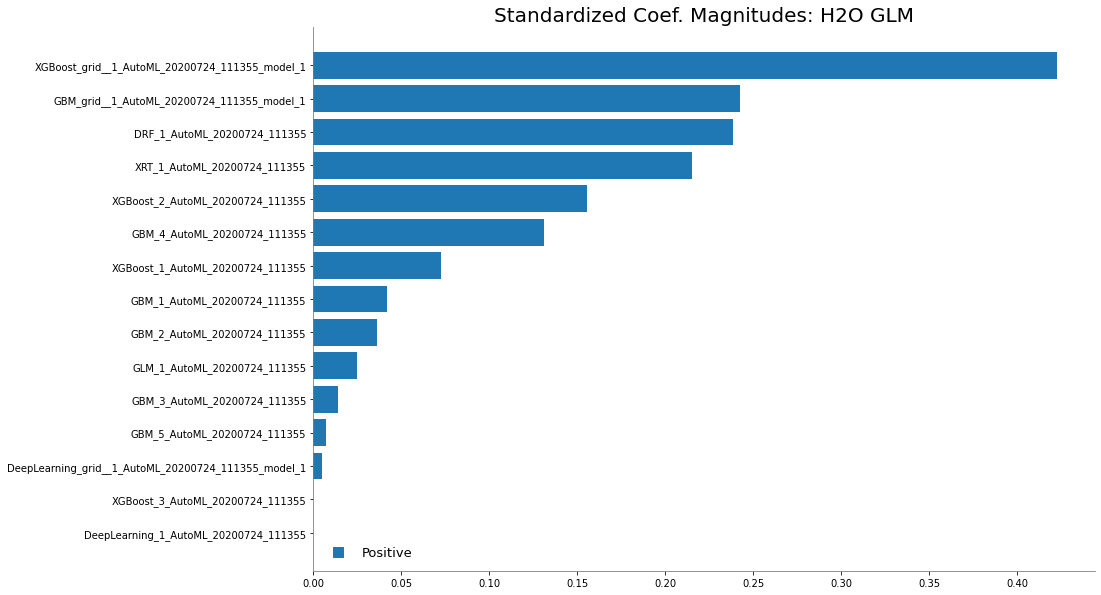

In [60]:
%matplotlib inline
metalearner.std_coef_plot()         #Examine the variable importance of the metalearner (combiner) algorithm in the ensemble. This shows us how much each base learner is contributing to the ensemble.

In [55]:
SE.params

{'base_models': {'actual': [{'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'XGBoost_grid__1_AutoML_20200724_111355_model_1',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_grid__1_AutoML_20200724_111355_model_1',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_1_AutoML_20200724_111355',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_3_AutoML_20200724_111355',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_2_AutoML_20200724_111355',
    'type': 'Key<Keyed>'},
   

In [56]:
SE

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20200724_111355

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.03688677744743647
RMSE: 0.1920593071096438
LogLoss: 0.13900054526341946
Null degrees of freedom: 10059
Residual degrees of freedom: 10046
Null deviance: 7269.493908362409
Residual deviance: 2796.6909706999995
AIC: 2824.6909706999995
AUC: 0.9806578815798258
AUCPR: 0.8882283308377885
Gini: 0.9613157631596516

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28713708240141866: 


,,no,yes,Error,Rate
0,no,8584.0,297.0,0.0334,(297.0/8881.0)
1,yes,199.0,980.0,0.1688,(199.0/1179.0)
2,Total,8783.0,1277.0,0.0493,(496.0/10060.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.287137,0.798046,232.0
1,max f2,0.132834,0.855953,296.0
2,max f0point5,0.501016,0.832073,161.0
3,max accuracy,0.410730,0.952187,190.0
4,max precision,0.969544,1.000000,0.0
5,max recall,0.030530,1.000000,391.0
6,max specificity,0.969544,1.000000,0.0
7,max absolute_mcc,0.287137,0.770813,232.0
8,max min_per_class_accuracy,0.140654,0.930188,291.0
9,max mean_per_class_accuracy,0.121207,0.934582,302.0



Gains/Lift Table: Avg response rate: 11.72 %, avg score: 12.26 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01004,0.926475,8.532655,8.532655,1.000000,0.946573,1.000000,0.946573,0.085666,0.085666,753.265479,753.265479,0.085666
1,2,0.02008,0.890974,8.363691,8.448173,0.980198,0.908561,0.990099,0.927567,0.083969,0.169635,736.369133,744.817306,0.169410
2,3,0.03002,0.846418,8.532655,8.476147,1.000000,0.870552,0.993377,0.908688,0.084818,0.254453,753.265479,747.614714,0.254228
3,4,0.04006,0.797046,8.194728,8.405618,0.960396,0.824274,0.985112,0.887532,0.082273,0.336726,719.472787,740.561775,0.336050
4,5,0.05000,0.737398,7.935369,8.312129,0.930000,0.767240,0.974155,0.863617,0.078880,0.415606,693.536896,731.212892,0.414143
5,6,0.10000,0.414209,6.106870,7.209500,0.715706,0.565956,0.844930,0.714787,0.305344,0.720950,510.687023,620.949958,0.703384
6,7,0.15000,0.194429,3.358779,5.925926,0.393638,0.296603,0.694500,0.575392,0.167939,0.888889,235.877863,492.592593,0.836980
7,8,0.20000,0.096460,1.458863,4.809160,0.170974,0.135300,0.563618,0.465369,0.072943,0.961832,45.886344,380.916031,0.862969
8,9,0.30000,0.049142,0.296862,3.305061,0.034791,0.065865,0.387343,0.332201,0.029686,0.991518,-70.313825,230.506079,0.783321
9,10,0.40000,0.038036,0.059372,2.493639,0.006958,0.043132,0.292247,0.259934,0.005937,0.997455,-94.062765,149.363868,0.676771




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.06659224956917476
RMSE: 0.2580547414196739
LogLoss: 0.22171917394706175
Null degrees of freedom: 36235
Residual degrees of freedom: 36224
Null deviance: 26047.14857958586
Residual deviance: 16068.43197429146
AIC: 16092.43197429146
AUC: 0.9301562230511352
AUCPR: 0.6076861951184704
Gini: 0.8603124461022704

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.18292695929068553: 


,,no,yes,Error,Rate
0,no,29469.0,2555.0,0.0798,(2555.0/32024.0)
1,yes,1163.0,3049.0,0.2761,(1163.0/4212.0)
2,Total,30632.0,5604.0,0.1026,(3718.0/36236.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.182927,0.621231,275.0
1,max f2,0.066142,0.728391,340.0
2,max f0point5,0.351153,0.592197,207.0
3,max accuracy,0.453032,0.906281,174.0
4,max precision,0.981863,1.000000,0.0
5,max recall,0.024893,1.000000,398.0
6,max specificity,0.981863,1.000000,0.0
7,max absolute_mcc,0.147293,0.571830,290.0
8,max min_per_class_accuracy,0.079990,0.859699,330.0
9,max mean_per_class_accuracy,0.054142,0.865788,350.0



Gains/Lift Table: Avg response rate: 11.62 %, avg score: 11.62 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010018,0.908524,7.062550,7.062550,0.820937,0.937589,0.820937,0.937589,0.070750,0.070750,606.254987,606.254987,0.068721
1,2,0.020008,0.849158,6.202744,6.633240,0.720994,0.879995,0.771034,0.908832,0.061966,0.132716,520.274354,563.323968,0.127532
2,3,0.030025,0.793418,5.972358,6.412743,0.694215,0.822327,0.745404,0.879970,0.059829,0.192545,497.235761,541.274318,0.183895
3,4,0.040015,0.733063,5.442254,6.170456,0.632597,0.763123,0.717241,0.850799,0.054368,0.246914,444.225391,517.045551,0.234111
4,5,0.050006,0.670209,5.204601,5.977498,0.604972,0.701644,0.694812,0.821001,0.051994,0.298908,420.460090,497.749780,0.281640
5,6,0.100011,0.399147,4.524667,5.251082,0.525938,0.532568,0.610375,0.676784,0.226258,0.525166,352.466673,425.108226,0.481074
6,7,0.150017,0.195425,3.670060,4.724075,0.426600,0.286075,0.549117,0.546548,0.183523,0.708689,267.006021,372.407491,0.632153
7,8,0.200022,0.101738,2.212481,4.096177,0.257174,0.141071,0.476131,0.445179,0.110636,0.819326,121.248132,309.617651,0.700758
8,9,0.300006,0.046677,1.211027,3.134637,0.140767,0.067105,0.364364,0.319178,0.121083,0.940408,21.102673,213.463685,0.724633
9,10,0.400017,0.034799,0.341843,2.436390,0.039735,0.039479,0.283201,0.249248,0.034188,0.974596,-65.815739,143.639012,0.650152


In [57]:
SE.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28713708240141866: 


,,no,yes,Error,Rate
0,no,8584.0,297.0,0.0334,(297.0/8881.0)
1,yes,199.0,980.0,0.1688,(199.0/1179.0)
2,Total,8783.0,1277.0,0.0493,(496.0/10060.0)


In [81]:
pred=aml.leader.predict(test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [82]:
pred.head()

predict,no,yes
no,0.96954,0.0304598
no,0.973842,0.0261579
no,0.97305,0.0269503
yes,0.651465,0.348535
no,0.973421,0.0265787
no,0.967308,0.0326922
no,0.971743,0.0282569
no,0.970225,0.0297746
no,0.972237,0.0277629
no,0.968821,0.031179


In [31]:
aml.leader.model_performance(test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.13646660910652506
RMSE: 0.36941387237964557
LogLoss: 0.4238875203488154
Mean Per-Class Error: 0.22278162285005942
AUC: 0.8428658127162854
AUCPR: 0.6663074483458588
Gini: 0.6857316254325707

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3237317597108132: 


,,No,Yes,Error,Rate
0,No,823.0,196.0,0.1923,(196.0/1019.0)
1,Yes,101.0,279.0,0.2658,(101.0/380.0)
2,Total,924.0,475.0,0.2123,(297.0/1399.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.323732,0.652632,201.0
1,max f2,0.189323,0.748085,270.0
2,max f0point5,0.480339,0.653183,131.0
3,max accuracy,0.480339,0.808435,131.0
4,max precision,0.879000,1.000000,0.0
5,max recall,0.025135,1.000000,396.0
6,max specificity,0.879000,1.000000,0.0
7,max absolute_mcc,0.323732,0.508964,201.0
8,max min_per_class_accuracy,0.288592,0.762512,218.0
9,max mean_per_class_accuracy,0.259807,0.777218,234.0



Gains/Lift Table: Avg response rate: 27.16 %, avg score: 26.38 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010007,0.821167,2.892669,2.892669,0.785714,0.844656,0.785714,0.844656,0.028947,0.028947,189.266917,189.266917,0.026003
1,2,0.020729,0.798085,3.681579,3.300726,1.000000,0.809088,0.896552,0.826259,0.039474,0.068421,268.157895,230.072595,0.065477
2,3,0.030021,0.774677,3.115182,3.243296,0.846154,0.787413,0.880952,0.814235,0.028947,0.097368,211.518219,224.329574,0.092462
3,4,0.040029,0.753979,2.629699,3.089897,0.714286,0.763218,0.839286,0.801481,0.026316,0.123684,162.969925,208.989662,0.114852
4,5,0.050036,0.734751,2.892669,3.050451,0.785714,0.743438,0.828571,0.789872,0.028947,0.152632,189.266917,205.045113,0.140855
5,6,0.100071,0.637059,2.682293,2.866372,0.728571,0.686019,0.778571,0.737946,0.134211,0.286842,168.229323,186.637218,0.256420
6,7,0.150107,0.544852,2.208947,2.647231,0.600000,0.592297,0.719048,0.689396,0.110526,0.397368,120.894737,164.723058,0.339469
7,8,0.200143,0.485817,2.314135,2.563957,0.628571,0.514564,0.696429,0.645688,0.115789,0.513158,131.413534,156.395677,0.429743
8,9,0.300214,0.360181,1.551523,2.226479,0.421429,0.423499,0.604762,0.571625,0.155263,0.668421,55.152256,122.647870,0.505516
9,10,0.400286,0.269324,1.288553,1.991997,0.350000,0.313719,0.541071,0.507148,0.128947,0.797368,28.855263,99.199718,0.545160


In [ ]:
h2o.save_model(aml.leader, path="./")